**************Importing the libraries***************

In [2]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt # graphics package
import seaborn as sns
from IPython.display import display, HTML

**************loading the dataset************

In [4]:
data = pd.read_csv('E:\Masters\Major Project-1_MAN\Telco- Churn\dataset\Big ML Teleco Churn.csv')
data.head(3)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

***************Data Exploration******************

In [5]:
#Check missing value/null
tab_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_info)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
column type,object,int64,int64,object,object,object,int64,float64,int64,float64,...,int64,float64,float64,int64,float64,float64,int64,float64,int64,bool
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Check duplicate instances
data.duplicated().sum()

0

In [7]:
#Transposing data
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [8]:
#Exploration of class values
pd.value_counts(data["churn"])

False    2850
True      483
Name: churn, dtype: int64

In [8]:
#Correlation 
correlation = data.corr(method='pearson')
print(correlation)

                        account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl m

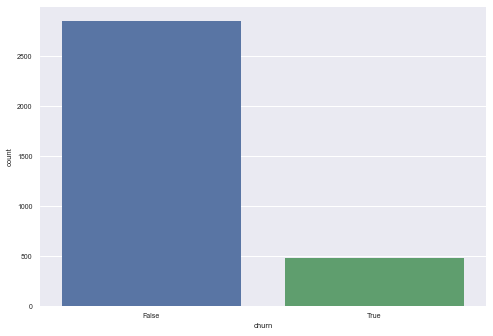

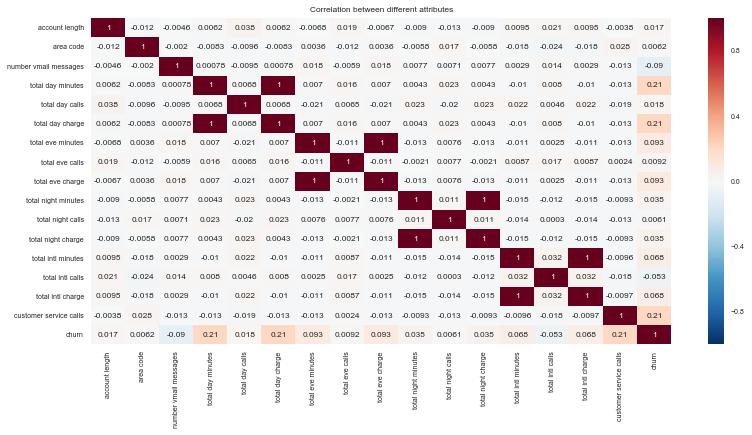

In [9]:
#Using the correlation matrix
matplotlib.rcParams.update({'font.size': 22})
sns.set(font_scale=.7)
sns.countplot(x="churn", data=data)
plt.figure(figsize=(13,6))
sns.heatmap(data.corr(method='pearson'),annot=True)
plt.title('Correlation between different attributes')
plt.savefig("Figure 2_Correlation Attribute.png") #save figure

**********************Data Preprocessing****************************

In [14]:
#Feature selection
X = data.iloc[:, [4,5,6,7,8,10,11,13,14,16,17,19]].values
z= data.iloc[:, [4,5,6,7,8,10,11,13,14,16,17,19]]
y = data.iloc[:, 20].values
print(X.shape)
print(X)
print(y)
print(z.info())

(3333, 12)
[['no' 'yes' 25 ..., 10.0 3 1]
 ['no' 'yes' 26 ..., 13.7 3 1]
 ['no' 'no' 0 ..., 12.2 5 0]
 ..., 
 ['no' 'no' 0 ..., 14.1 6 2]
 ['yes' 'no' 0 ..., 5.0 10 2]
 ['no' 'yes' 25 ..., 13.7 4 0]]
[False False False ..., False False False]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
customer service calls    3333 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 312.5+ KB
None


*************Preparing for algorithm******************

In [11]:
#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
labEnco = LabelEncoder()

X[:, 0] = labEnco.fit_transform(X[:, 0])
X[:, 1] = labEnco.fit_transform(X[:, 1])

y = labEnco.fit_transform(y)



In [12]:
print(X)
print(y)
print(X.shape)

[[0 1 25 ..., 10.0 3 1]
 [0 1 26 ..., 13.7 3 1]
 [0 0 0 ..., 12.2 5 0]
 ..., 
 [0 0 0 ..., 14.1 6 2]
 [1 0 0 ..., 5.0 10 2]
 [0 1 25 ..., 13.7 4 0]]
[0 0 0 ..., 0 0 0]
(3333, 12)


In [47]:
#Training testing split 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
print(X_train)




[[0 0 0 ..., 0.0 0 4]
 [1 1 12 ..., 12.3 7 2]
 [0 0 0 ..., 16.6 4 2]
 ..., 
 [1 0 0 ..., 11.1 2 1]
 [0 0 0 ..., 9.9 3 3]
 [1 0 0 ..., 16.9 2 5]]


In [48]:
#fitting Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

#Predicting the Test set results
NB_predict = classifier_NB.predict(X_test)
print('Accuracy of Naive Bayes for Training Set is: ',classifier_NB.score(X_train,y_train) *100)
print('Accuracy of Naive Bayes for Testing Set is: ',classifier_NB.score(X_test,y_test) *100)



Accuracy of Naive Bayes for Training Set is:  85.2978997
Accuracy of Naive Bayes for Testing Set is:  84.6


***************************** Naive Bayes *********************************

In [49]:
# Evaluate using Cross-Validation of 10 folds
from sklearn.model_selection import cross_val_score
print("Naive Bayes")
print(cross_val_score(classifier_NB, X, y, scoring='accuracy', cv = 10))
cv_accuracy_NB = cross_val_score(classifier_NB, X, y, scoring='accuracy', cv = 10).mean() * 100  #try without .mean()
print("Accuracy of Naive Bayes is: " , cv_accuracy_NB)

Naive Bayes
[ 0.84730539  0.86526946  0.84131737  0.83183183  0.85585586  0.85285285
  0.85885886  0.85885886  0.85585586  0.84684685]
Accuracy of Naive Bayes is:  85.1485317653


In [16]:
#print(y_test)
#print(NB_predict)

Naive Bayes : Confusion Matrix
[[788  74]
 [ 80  58]]
Confusion matrix plot of Naive Bayes


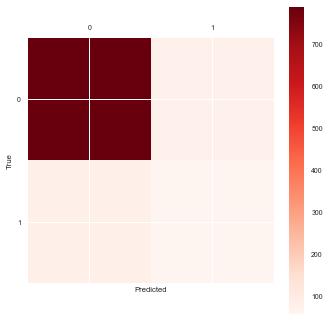

Classification Report
             precision    recall  f1-score   support

          0       0.91      0.91      0.91       862
          1       0.44      0.42      0.43       138

avg / total       0.84      0.85      0.84      1000



In [50]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

#Claculating and plotting the confusion Matrix
cm_NB = confusion_matrix(y_test, NB_predict)
print('Naive Bayes : Confusion Matrix')
print(cm_NB)
ax=plt.matshow(cm_NB,cmap=plt.cm.Reds)
print('Confusion matrix plot of Naive Bayes')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Classification report
print('Classification Report')
print(classification_report(y_test, NB_predict))

****************************Deciison Tree**********************************

In [18]:
#fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier 
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state =0) 
classifier_DT.fit(X_train, y_train)


#Predicting the Test set results
DT_predict = classifier_DT.predict(X_test)
print('Accuracy of Decision Tree for Training Set is: ',classifier_DT.score(X_train,y_train) *100)
print('Accuracy of Decision Tree Machine for Testing Set is: ',classifier_DT.score(X_test,y_test) *100)




Accuracy of Decision Tree for Training Set is:  100.0
Accuracy of Decision Tree Machine for Testing Set is:  90.8


In [19]:
#print(y_test)
#print(SVM_predict)

In [20]:
# Evaluate using Cross-Validation of 10 folds
from sklearn.model_selection import cross_val_score
print("Decision Tree")
print(cross_val_score(classifier_DT, X, y, scoring='accuracy', cv = 10))
cv_accuracy_DT = cross_val_score(classifier_DT, X, y, scoring='accuracy', cv = 10).mean() * 100  #try without .mean()
print("Accuracy of Decision Tree is: " , cv_accuracy_DT)

Decision Tree
[ 0.91317365  0.93712575  0.90419162  0.91291291  0.94894895  0.92492492
  0.90990991  0.93693694  0.90690691  0.93993994]
Accuracy of Decision Tree is:  92.3497149844


Decision Tree : Confusion Matrix
[[802  60]
 [ 32 106]]
Confusion matrix plot of Decision tree


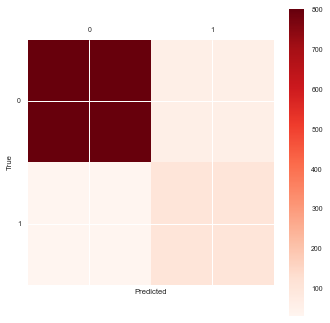

Classification Report
             precision    recall  f1-score   support

          0       0.96      0.93      0.95       862
          1       0.64      0.77      0.70       138

avg / total       0.92      0.91      0.91      1000



In [21]:
#Claculating and plotting the confusion Matrix
cm_DT = confusion_matrix(y_test, DT_predict)
print('Decision Tree : Confusion Matrix')
print(cm_DT)
ax=plt.matshow(cm_DT,cmap=plt.cm.Reds)
print('Confusion matrix plot of Decision tree')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#Classification report
print('Classification Report')
print(classification_report(y_test, DT_predict))

************************Logistic Regression******************************

In [33]:
#Fitting the logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

#Predicting the Test set results
LR_predict = classifier_LR.predict(X_test)
print('Accuracy of Logistic Regression for Training Set is: ',classifier_LR.score(X_train,y_train) *100)
print('Accuracy of Logistic Regression for Testing Set is: ',classifier_LR.score(X_test,y_test) *100)


    

Accuracy of Logistic Regression for Training Set is:  85.5979425632
Accuracy of Logistic Regression for Testing Set is:  87.0


In [34]:
# Evaluate using Cross-Validation of 10 folds
from sklearn.model_selection import cross_val_score
print("Logistic Regression")
print(cross_val_score(classifier_LR, X, y, scoring='accuracy', cv = 10))
cv_accuracy_LR = cross_val_score(classifier_LR, X, y, scoring='accuracy', cv = 10).mean() * 100  #try without .mean()
print("Accuracy of Logistic Regression is: " , cv_accuracy_LR)

Logistic Regression
[ 0.84730539  0.8742515   0.85928144  0.85285285  0.85285285  0.86186186
  0.87387387  0.86486486  0.86186186  0.84984985]
Accuracy of Logistic Regression is:  85.9885634137


Logistic Regression : Confusion Matrix
[[846  16]
 [114  24]]
Confusion matrix plot of Logistic Regression


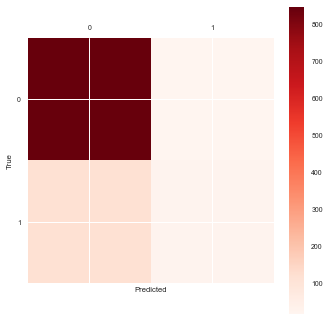

Classification Report
             precision    recall  f1-score   support

          0       0.88      0.98      0.93       862
          1       0.60      0.17      0.27       138

avg / total       0.84      0.87      0.84      1000



In [36]:
#Claculating and plotting the confusion Matrix
cm_LR = confusion_matrix(y_test, LR_predict)
print('Logistic Regression : Confusion Matrix')
print(cm_LR)
ax=plt.matshow(cm_LR,cmap=plt.cm.Reds)
print('Confusion matrix plot of Logistic Regression')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#Classification report
print('Classification Report')
print(classification_report(y_test, LR_predict))